In [5]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/holoviz/panel/master/examples/assets/occupancy.csv')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [6]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

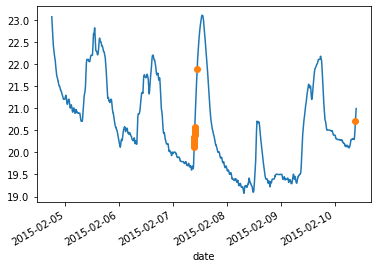

In [7]:
find_outliers(variable='Temperature', window=20, sigma=10)

In [10]:
import panel as pn
pn.extension()

pn.interact(find_outliers)

BokehModel(combine_events=True, render_bundle={'docs_json': {'00f338c2-afe2-4f0c-aecd-61072428559a': {'defs': …

Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00112')

Callback failed for object named "window" changing property {'value': -8} 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/panel/reactive.py", line 315, in _process_events
    self.param.update(**self_events)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/param/parameterized.py", line 1898, in update
    self_._batch_call_watchers()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/param/parameterized.py", line 2059, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/param/parameterized.py", line 2021, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/panel/interact.py", line 188, in update_pane
    new_object = self.object(**self.kwargs)
  Fi